# Legtöbbvált 2. óra: Görbék II.




In [0]:
# paraméterezzünk egyszerű görbéket!

import numpy as np


t = np.linspace(0,10,1000) #1D array, elemei 0-tól 10ig változnak, és 1000 részre bontják az intervallumot.

#csináljunk egy hélixet!

x = np.sin(t) #elemenként vesszük a sin, cos értékeket.
y = np.cos(t)
z = 0.5*t


In [0]:


import matplotlib.pyplot as plt #plotoláshoz import
from mpl_toolkits import mplot3d


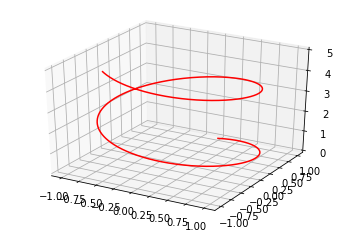

In [0]:
fig = plt.figure() #plot
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z, 'red')

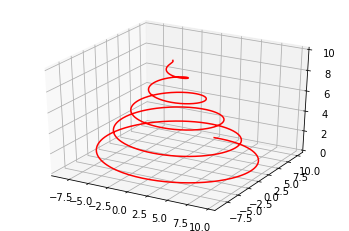

In [0]:
#FELADAT: KARÁCSONYFA PLOT - VÁLASZTÁSI LÁZ 

#rajzoljatok ki "karácsonyfafüzért!" 10 egység magas a karácsonyfánk, sugara az aljánál 10 egység, az oldala egyenes. A füzér 5 teljes kört megtesz.

x = np.sin(t*3.15)*(10-t) #t-t felszorozva pi-nél nagyobb számmal az eredmény 10pi-nél tovább megy, ez több, mint 5*2pi
y = np.cos(t*3.15)*(10-t) # *(10-t) adja a sugár csökkenését 0-tól 10-ig, 10-ben épp 0.
z = t # 10 egység magas legyen

fig = plt.figure() #plot
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z, 'red')

## Spline görbék

![alt text](https://upload.wikimedia.org/wikipedia/commons/f/f2/Spline01.gif)

Szakaszosan parametrikus polinomokkal leírt görbéinket hívjuk splineoknak. Ezekkel nagyon jól tudunk szép, "sima" érzetű görbéket generálni, ezért használják őket a mérnöki tervezésben és a számítógépes grafikában az 1960-as évektől.

Nem csak sík- és térgörbe lehet spline: amikor az érintőképernyős eszközeinkkel ujjainkal "arrrébb húzunk" valamit, akkor az objektum sebességét egy splineal közelítik, ezért halad olyan "símán" (valakik ezeket robottal kimérték: http://malacria.com/media/pdf/roboscroll.pdf).

A splineok alapjairól itt találtok egy egész jó összeállítást: http://www.mogi.bme.hu/TAMOP/3d_megjelenitesi_technikak/ch03.html#ch-III.3.3

Ha nagyon bele szeretnétek ásni magatokat, nézzeket meg OpenCourseWare-en pár szuper előadást.

Egy jó cikk a splineok alkalmazásáról a számítógépes megjelenítésben az Nvidiától: https://developer.nvidia.com/gpugems/GPUGems3/gpugems3_ch25.html

Egy szuper videósorozat a splineokkal Unityben - Sebastian Lang zseniális: https://www.youtube.com/watch?v=RF04Fi9OCPc 

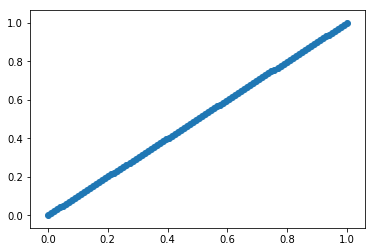

In [0]:
#A legegyszerűbb spline: pontok összekötése: csináljuk meg "0-ról"
#legyen most 2D, hogy könyebb legyen.

import numpy as np
import matplotlib.pyplot as plt


def splinefunc(points, resolution): #pontok listáját és a felbontást várom paraméterként
  num_of_points = len(points) #a lista hossza a pontjaim száma
  coords = np.empty([(num_of_points-1)*resolution,2]) #üres array inicializálása memóriaszeméttel
  
  for index, point in enumerate(points): #index 0-tól len(points)-ig megy, point a pointson megy végig
    
    if index == len(points)-1:
      break #kibrékelek, ha az utolsó ponthoz értem
      
    t=np.linspace(0,1,resolution) #resolution részre osztom a pontok közti részt
    dx = points[index+1][0]-point[0] #x, y különbségek a kezdő- és végpont között
    dy = points[index+1][1]-point[1]
    coords[index*resolution:(index+1)*resolution,0] = point[0]+t*dx #coords megfelelő elemei legyenek egy egyenesen a két pont között, dy/dx meredekséggel
    coords[index*resolution:(index+1)*resolution,1] = point[1]+t*dy
    
  return coords #visszatérek a teljes array-al
    
plotthing = splinefunc([[0,0], [1,1]],100)

plt.scatter(plotthing[:,0],plotthing[:,1])
plt.show()

#plot hibáját az antialiasing hiánya okozza, utánaolvasni ér!
    
    
  

![alt text](https://www.codeproject.com/KB/GDI/antialias/antialias.png)

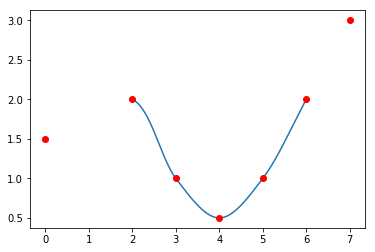

In [0]:
#egy lopott Catmull-Rom spline számolóka

import numpy
import pylab as plt

#https://www.ibiblio.org/e-notes/Splines/cardinal.html - numerikus stabilitás kérdése!

def CatmullRomSpline(P0, P1, P2, P3, nPoints=100):
  """
  P0, P1, P2, and P3 should be (x,y) point pairs that define the Catmull-Rom spline.
  nPoints is the number of points to include in this curve segment.
  """
  # Convert the points to numpy so that we can do array multiplication
  P0, P1, P2, P3 = map(numpy.array, [P0, P1, P2, P3])

  # Calculate t0 to t4
  alpha = 0.5
  def tj(ti, Pi, Pj):
    xi, yi = Pi
    xj, yj = Pj
    return ( ( (xj-xi)**2 + (yj-yi)**2 )**0.5 )**alpha + ti

  t0 = 0
  t1 = tj(t0, P0, P1)
  t2 = tj(t1, P1, P2)
  t3 = tj(t2, P2, P3)

  # Only calculate points between P1 and P2
  t = numpy.linspace(t1,t2,nPoints)

  # Reshape so that we can multiply by the points P0 to P3
  # and get a point for each value of t.
  t = t.reshape(len(t),1)
  print(t)
  A1 = (t1-t)/(t1-t0)*P0 + (t-t0)/(t1-t0)*P1
  A2 = (t2-t)/(t2-t1)*P1 + (t-t1)/(t2-t1)*P2
  A3 = (t3-t)/(t3-t2)*P2 + (t-t2)/(t3-t2)*P3
  print(A1)
  print(A2)
  print(A3)
  B1 = (t2-t)/(t2-t0)*A1 + (t-t0)/(t2-t0)*A2
  B2 = (t3-t)/(t3-t1)*A2 + (t-t1)/(t3-t1)*A3

  C  = (t2-t)/(t2-t1)*B1 + (t-t1)/(t2-t1)*B2
  return C

def CatmullRomChain(P):
  """
  Calculate Catmull Rom for a chain of points and return the combined curve.
  """
  sz = len(P)

  # The curve C will contain an array of (x,y) points.
  C = []
  for i in range(sz-3):
    c = CatmullRomSpline(P[i], P[i+1], P[i+2], P[i+3])
    C.extend(c)

  return C

# Define a set of points for curve to go through
Points = [[0,1.5],[2,2],[3,1],[4,0.5],[5,1],[6,2],[7,3]]

# Calculate the Catmull-Rom splines through the points
c = CatmullRomChain(Points)

# Convert the Catmull-Rom curve points into x and y arrays and plot
x,y = zip(*c)
plt.plot(x,y)

# Plot the control points
px, py = zip(*Points)
plt.plot(px,py,'or')

plt.show()